# Algorithmic Trading Analysis

This notebook demonstrates basic algorithmic trading concepts and analysis.

In [1]:
import sys
import os
sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from utils.data_fetcher import DataFetcher
from strategies.simple_moving_average import SimpleMovingAverageStrategy
from backtesting.backtester import Backtester

# Set style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("📚 Libraries imported successfully!")

📚 Libraries imported successfully!


## 1. Data Fetching

In [4]:
# Initialize data fetcher
data_fetcher = DataFetcher()

# Fetch data for multiple stocks
symbols = ['AAPL', 'GOOGL', 'MSFT', 'TSLA']
data_dict = data_fetcher.fetch_multiple_symbols(symbols, period='1y')

# Display basic info
for symbol, data in data_dict.items():
    if data is not None:
        print(f"{symbol}: {data.shape[0]} days, Price range: ${data['Close'].min():.2f} - ${data['Close'].max():.2f}")

AAPL: 250 days, Price range: $172.19 - $258.40
GOOGL: 250 days, Price range: $144.53 - $205.89
MSFT: 250 days, Price range: $353.91 - $498.84
TSLA: 250 days, Price range: $191.76 - $479.86


## 2. Price Visualization

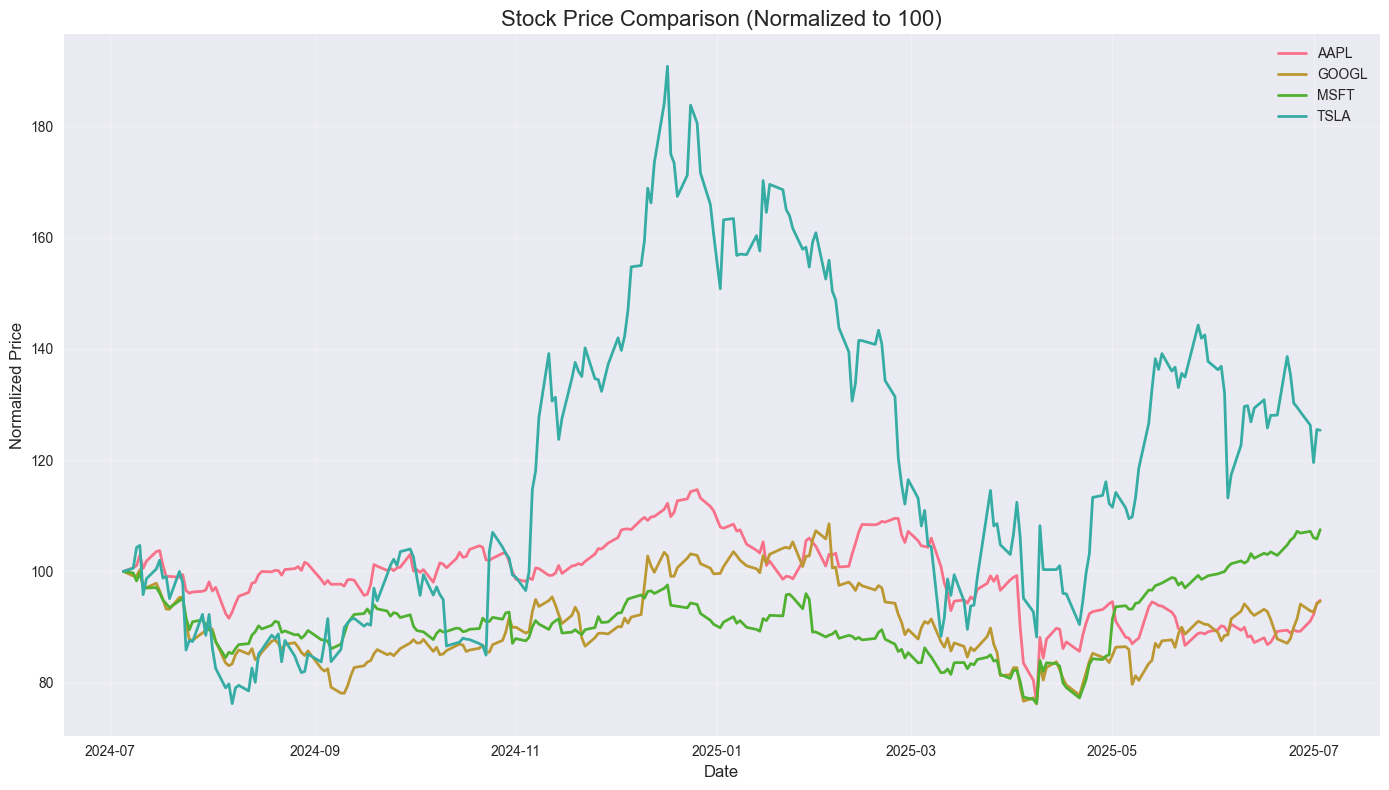

In [5]:
# Create price comparison chart
plt.figure(figsize=(14, 8))

for symbol, data in data_dict.items():
    if data is not None:
        # Normalize to starting value for comparison
        normalized = (data['Close'] / data['Close'].iloc[0]) * 100
        plt.plot(data.index, normalized, label=symbol, linewidth=2)

plt.title('Stock Price Comparison (Normalized to 100)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Normalized Price', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 3. Strategy Testing

In [6]:
# Test strategy on Apple stock
symbol = 'AAPL'
data = data_dict[symbol]

# Initialize strategy and backtester
strategy = SimpleMovingAverageStrategy(short_window=20, long_window=50)
backtester = Backtester(initial_capital=10000)

# Generate signals
signals = strategy.generate_signals(data)

# Run backtest
metrics = backtester.run_backtest(data, signals)

# Display results
print(f"Results for {symbol}:")
print(f"Total Return: {metrics['total_return']:.2%}")
print(f"Annual Return: {metrics['annual_return']:.2%}")
print(f"Sharpe Ratio: {metrics['sharpe_ratio']:.2f}")
print(f"Max Drawdown: {metrics['max_drawdown']:.2%}")
print(f"Total Trades: {metrics['total_trades']}")

Results for AAPL:
Total Return: -13.60%
Annual Return: -13.70%
Sharpe Ratio: -0.91
Max Drawdown: -21.46%
Total Trades: 8


/Users/piyushmehta/projects/algo-trading/notebooks/../strategies/simple_moving_average.py:31: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  signals['signal'][self.short_window:] = np.where(
/Users/piyushmehta/projects/algo-trading/notebooks/

## 4. Strategy Visualization

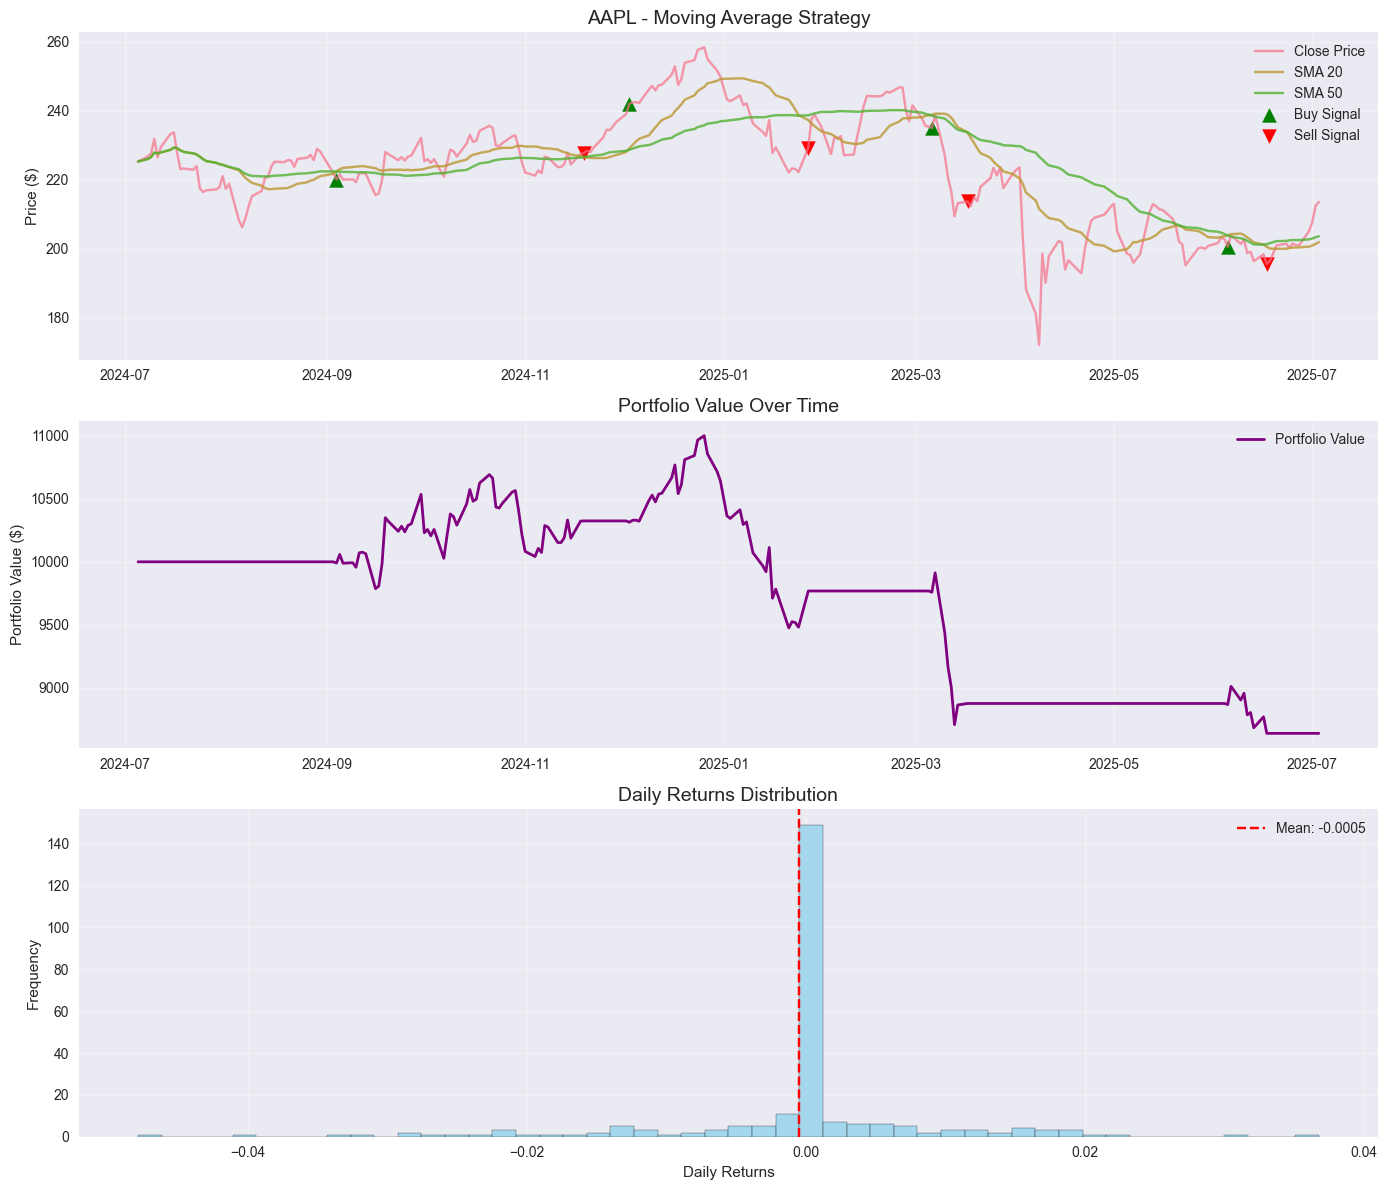

In [7]:
# Create comprehensive strategy visualization
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(14, 12))

# Plot 1: Price and Moving Averages
ax1.plot(data.index, data['Close'], label='Close Price', alpha=0.7)
ax1.plot(signals.index, signals['short_mavg'], label=f'SMA {strategy.short_window}', alpha=0.8)
ax1.plot(signals.index, signals['long_mavg'], label=f'SMA {strategy.long_window}', alpha=0.8)

# Mark buy/sell points
buy_points = signals[signals['positions'] == 1.0]
sell_points = signals[signals['positions'] == -1.0]

ax1.scatter(buy_points.index, buy_points['price'], color='green', marker='^', s=100, label='Buy Signal')
ax1.scatter(sell_points.index, sell_points['price'], color='red', marker='v', s=100, label='Sell Signal')

ax1.set_title(f'{symbol} - Moving Average Strategy', fontsize=14)
ax1.set_ylabel('Price ($)')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Portfolio Value
ax2.plot(backtester.portfolio.index, backtester.portfolio['total'], label='Portfolio Value', color='purple', linewidth=2)
ax2.set_title('Portfolio Value Over Time', fontsize=14)
ax2.set_ylabel('Portfolio Value ($)')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot 3: Returns Distribution
daily_returns = backtester.portfolio['total'].pct_change().dropna()
ax3.hist(daily_returns, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
ax3.axvline(daily_returns.mean(), color='red', linestyle='--', label=f'Mean: {daily_returns.mean():.4f}')
ax3.set_title('Daily Returns Distribution', fontsize=14)
ax3.set_xlabel('Daily Returns')
ax3.set_ylabel('Frequency')
ax3.legend()
ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 5. Multi-Stock Strategy Comparison

In [ ]:
# Compare strategy performance across multiple stocks
results_df = pd.DataFrame()

for symbol, data in data_dict.items():
    if data is not None:
        # Run strategy
        strategy = SimpleMovingAverageStrategy(short_window=20, long_window=50)
        backtester = Backtester(initial_capital=10000)
        
        signals = strategy.generate_signals(data)
        metrics = backtester.run_backtest(data, signals)
        
        # Store results
        results_df = pd.concat([results_df, pd.DataFrame([{
            'Symbol': symbol,
            'Total Return': metrics['total_return'],
            'Annual Return': metrics['annual_return'],
            'Sharpe Ratio': metrics['sharpe_ratio'],
            'Max Drawdown': metrics['max_drawdown'],
            'Total Trades': metrics['total_trades']
        }])], ignore_index=True)

# Display results
print("Strategy Performance Comparison:")
print(results_df.round(4))

# Create comparison chart
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# Total Return
ax1.bar(results_df['Symbol'], results_df['Total Return'], color='skyblue')
ax1.set_title('Total Return by Stock')
ax1.set_ylabel('Return')
ax1.tick_params(axis='x', rotation=45)

# Sharpe Ratio
ax2.bar(results_df['Symbol'], results_df['Sharpe Ratio'], color='lightgreen')
ax2.set_title('Sharpe Ratio by Stock')
ax2.set_ylabel('Sharpe Ratio')
ax2.tick_params(axis='x', rotation=45)

# Max Drawdown
ax3.bar(results_df['Symbol'], results_df['Max Drawdown'], color='lightcoral')
ax3.set_title('Max Drawdown by Stock')
ax3.set_ylabel('Max Drawdown')
ax3.tick_params(axis='x', rotation=45)

# Total Trades
ax4.bar(results_df['Symbol'], results_df['Total Trades'], color='gold')
ax4.set_title('Total Trades by Stock')
ax4.set_ylabel('Number of Trades')
ax4.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## 6. Next Steps

Here are some ideas to expand your algorithmic trading setup:

1. **Add more strategies**: RSI, MACD, Bollinger Bands
2. **Risk management**: Stop-loss, position sizing
3. **Portfolio optimization**: Multi-asset strategies
4. **Machine learning**: Predictive models
5. **Real-time trading**: Paper trading integration
6. **Alternative data**: News sentiment, economic indicators